Step 1: Importing Libraries

In this step, we install and import all necessary libraries. We use xlrd to read Excel files, xgboost for the machine learning model, and several standard libraries like pandas, numpy, and matplotlib for data manipulation and visualization. We also suppress any warnings to make the output cleaner.

In [1]:
!pip install xlrd
!pip install xgboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.3 MB/s eta 0:00:00


Step 2: Importing Rotten Tomatoes Dataset

Here, we load the Rotten Tomatoes dataset using pandas.read_excel from the my grive file URL. We then select only  columns that are nessery for predicting (runtime_in_minutes, genre, rating, directors, cast, studio_name, and audience_rating) to create a new dataset.

We also drop rows with missing values using dropna() to ensure the dataset contains only complete records.

Source: Provided from zoho corporation in the process of interview
Link : https://insights.zohorecruit.com/ck1/2d6f.390d3f0/96a20220-bbb1-11ef-a082-525400e18d05/b9b5c6feb99ee8eba8a45afd013fc3938af8f708/2?e=XLROTa1eTGA%2FR1EjKs%2FxqzF2vFq3thEDANZDdhs2RFi9byvWl6Tb6dPKVC%2BE%2B%2FEn72TIWM469mi3yJluw0ZUoAErjkchndep1QZeY0l9U8zKM4UXhXGmkTf7UrUpVxBvoWTRqy8mQa5LWiI%2FXtJYHg%3D%3D

In [2]:
path_file = 'https://drive.google.com/uc?id=1V78HXI_X9Ehbs9KxWIAs-jc5g3wlMPq-'
rotten_tomatoes_data = pd.read_excel(path_file)

In [47]:
rotten_tomatoes_data.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0


In [3]:
#Extracting nessery features from the main dataset
columns_data_feature = ["runtime_in_minutes", "genre", "rating", "directors", "cast", "studio_name", "audience_rating"]
rotten_tomatoes_data_featured = rotten_tomatoes_data[columns_data_feature]

print("Dimetion of the dataset before droping: " + str(rotten_tomatoes_data_featured.shape))

#Droping movies which don't have all the features
rotten_tomatoes_data_featured = rotten_tomatoes_data_featured.dropna()
print("Dimetion of the dataset after droping: " + str(rotten_tomatoes_data_featured.shape))

rotten_tomatoes_data_featured.head()

Dimetion of the dataset before droping: (16638, 7)
Dimetion of the dataset after droping: (15568, 7)


,runtime_in_minutes,genre,rating,directors,cast,studio_name,audience_rating
0,83.0,"Action & Adventure, Comedy, Drama, Science Fic...",PG,Chris Columbus,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",20th Century Fox,53.0
1,90.0,Comedy,R,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",Sony Pictures Classics,64.0
2,118.0,"Comedy, Romance",R,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",Waner Bros.,53.0
3,95.0,"Classics, Drama",NR,Sidney Lumet,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",Criterion Collection,97.0
4,127.0,"Action & Adventure, Drama, Kids & Family",G,Richard Fleischer,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",Disney,74.0


Step 3: Converting Features that are in the form of strings into Lists

In this step, we define a helper function process_data to split the string data in columns like genre, directors, and cast into lists.
We apply this function to those columns to convert the data into a list format, making it easier to work with. For studio_name, a separate function process_studio is defined to handle the division of studio names by slashes (/), because the studio_names are seperated by (/)

In [4]:
def process_data(data_string):
    return [data.strip() for data in data_string.split(',')]

# Features we need to process
features = ["genre", "directors", "cast"]

for feature in features:
  rotten_tomatoes_data_featured[feature] = rotten_tomatoes_data_featured[feature].apply(process_data)


In [5]:
def process_studio(data_line):
    if not isinstance(data_line, str):  # Convert non-string types to string
        data_line = str(data_line)

    studio_list = [studio.strip() for studio in data_line.split('/')]
    return studio_list

rotten_tomatoes_data_featured["studio_name"] = rotten_tomatoes_data_featured["studio_name"].apply(process_studio)
rotten_tomatoes_data_featured.head()

,runtime_in_minutes,genre,rating,directors,cast,studio_name,audience_rating
0,83.0,"[Action & Adventure, Comedy, Drama, Science Fi...",PG,[Chris Columbus],"[Logan Lerman, Brandon T. Jackson, Alexandra D...",[20th Century Fox],53.0
1,90.0,[Comedy],R,[Nicole Holofcener],"[Catherine Keener, Amanda Peet, Oliver Platt, ...",[Sony Pictures Classics],64.0
2,118.0,"[Comedy, Romance]",R,[Blake Edwards],"[Dudley Moore, Bo Derek, Julie Andrews, Robert...",[Waner Bros.],53.0
3,95.0,"[Classics, Drama]",NR,[Sidney Lumet],"[Martin Balsam, John Fiedler, Lee J. Cobb, E.G...",[Criterion Collection],97.0
4,127.0,"[Action & Adventure, Drama, Kids & Family]",G,[Richard Fleischer],"[James Mason, Kirk Douglas, Paul Lukas, Peter ...",[Disney],74.0


In [6]:
# Print a random sample of 10 rows from the updated DataFrame
rotten_tomatoes_data_featured.sample(10)

,runtime_in_minutes,genre,rating,directors,cast,studio_name,audience_rating
14166,82.0,"[Art House & International, Documentary, Drama...",NR,[Agn√®s Varda],"[Bodan Litnanski, Fran√ßois Wertheimer, Agn√®s...",[Zeitgeist Films],86.0
15504,96.0,"[Action & Adventure, Art House & International]",R,[Jesse V. Johnson],"[Tony Jaa, Iko Uwais, Tiger Hu Chen, Celina Ja...",[Well Go USA Entertainment],36.0
3756,94.0,[Comedy],NR,[Qaushiq Mukherjee],"[Shashank Arora, Shataf Figar, Denzil Smith, V...",[Netflix],45.0
1424,97.0,[Comedy],R,[Mitch Rouse],"[Matt Dillon, Christina Applegate, Steve Zahn,...",[LionsGate Entertainment],52.0
1932,89.0,[Musical & Performing Arts],NR,[Lloyd Bacon],"[Warner Baxter, Bebe Daniels, George Brent, Ru...",[MGM Home Entertainment],74.0
7132,81.0,[Horror],R,[B.J. McDonnell],"[Danielle Harris, Kane Hodder, Zach Galligan, ...",[MPI Media Group],39.0
2889,100.0,"[Drama, Mystery & Suspense]",R,[Markus Blunder],"[Sophie Lowe, Peter Stormare, Samuli Vauramo, ...",[Independent],37.0
4199,101.0,[Drama],PG-13,[Diego Luna],"[Michael Pe√±a, John Malkovich, America Ferrer...",[Pantelion Films],60.0
532,109.0,"[Action & Adventure, Classics, Drama]",G,[Zoltan Korda],"[Sab√∫, Rosemary DeCamp, Joseph Calleia, John ...",[Gravitas],56.0
12136,71.0,[Comedy],NR,[Liam Lynch],[Sarah Silverman],[Netflix],51.0


Step 4: Creating a List of distinct Features Based on Audience Rating Weight

We calculate the average audience rating for each unique feature (like genre, director, cast, and studio) by iterating through each entry in the dataset. This helps us assess the relevance of each feature based on its average rating, which is useful for later analysis. We create a list of features sorted in descending order of their average ratings.

In [7]:
def generate_feature(df, feature_name):
    feature_dict = {}
    for index, row in df.iterrows():
        feat = row[feature_name]
        for sub_feat in feat:
            if sub_feat not in feature_dict:
                feature_dict[sub_feat] = (rotten_tomatoes_data_featured['audience_rating'][index], 1)
            else:
                feature_dict[sub_feat] = (feature_dict[sub_feat][0] + (rotten_tomatoes_data_featured['audience_rating'][index]), feature_dict[sub_feat][1] + 1)

    #Step 2: calculate average ratings for each feature
    for key in feature_dict:
        feature_dict[key] = feature_dict[key][0]/feature_dict[key][1] #average of all vote_averages

    #Step 3: create and sort a list of tuples
    lst = list()
    for name in feature_dict:
        lst.append((feature_dict[name],name))
    lst = sorted(lst)

    #step 4: create a list of only the feature names, from lowest rating to highest rating
    feature_list = list()
    ratings_list = list()
    for element in lst:
        feature_list.append(element[1])
        ratings_list.append(element[0])

    return feature_list

In [8]:
genre_feature = generate_feature(rotten_tomatoes_data_featured, 'genre')
print(genre_feature)

['Horror', 'Mystery & Suspense', 'Cult Movies', 'Science Fiction & Fantasy', 'Action & Adventure', 'Comedy', 'Kids & Family', 'Gay & Lesbian', 'Drama', 'Romance', 'Animation', 'Western', 'Television', 'Art House & International', 'Faith & Spirituality', 'Musical & Performing Arts', 'Classics', 'Special Interest', 'Anime & Manga', 'Documentary', 'Sports & Fitness']


In [9]:
director_feature = generate_feature(rotten_tomatoes_data_featured, 'directors')
print(director_feature)

['Barry J. Hershey', 'Eddie Alcazar', 'Russell DeGrazier', 'Amy Schumer', 'Adam Marino', 'Jon Keeyes', 'Jorge Ameer', 'Joel Soisson', 'Matt Angel', 'Paul Tarnopol', 'Suzanne Coote', 'Christian Ford', 'Daniel Petrie', 'H√®ctor Hern√°ndez Vicens', 'Jean-Pierre Marois', 'Leah Sturgis', 'Maksim Korostyshevsky', 'Maxim Korostyshevsky', 'Pearry Reginald Teo', 'Tara Subkoff', 'York Alec Shackleton', 'Jesper Ganslandt', 'Larry Buchanan', 'Simeon Halligan', 'Zach Lipovsky', 'George Isaac', 'John Doyle', 'John W. Doyle', 'Leslie Greif', 'Ovidio G. Assonitis', 'Jorge Montesi', 'Farhad Mann', 'Jean de Segonzac', 'Michael Rasmussen (III)', 'Phil Tippett', 'Shawn Rasmussen (II)', 'William Nigh', 'Xiao Feng', 'C. Courtney Joyner', 'Jesse T. Cook', 'Neal Miller', 'Nick Lyon', 'Richard Ledes', 'Rita Merson', 'Robert Cavanah', 'Andrew Sipes', 'Ben Ketai', 'Dallas Richard Hallam', 'Duncan Gibbins', 'Francesco Cinquemani', 'James D.R. Hickox', 'Josh Forbes', 'Leland Orser', 'Mark Elijah Rosenberg', 'Padra

In [10]:
cast_feature = generate_feature(rotten_tomatoes_data_featured, 'cast')
print(cast_feature)

['Barry J. Hershey', 'Charles Strong', 'James Gaulding', 'Jonathan Dwayne', 'Regan Farquhar', 'Sarah McDaniel', 'Timothy Newman', 'Alexander Fazel', 'Caitlin Stainken', 'Caroline White', 'Mehmet G√ºns√ºr', 'Xavier Jimenez-March', 'Adda Senani', 'Patricia Barzyk', 'Ariana Altman', 'Carmen Duncan', 'Chelsea Simmons', 'Corey Sevier', 'Craig Pinkston', 'Dave Morgan', 'Dinka Dzubur', 'Erin Leigh Price', 'Glenn Maynard', 'Jon Sherrin', 'Jordan Dowding', 'Juan Jackson', 'Leah Vandenberg', 'Mfoniso Udofia', 'Peter Roordink', 'Raphael Cruz', 'Sharelle Starr', 'Sofia Pernas', 'Sol Le√≥n and Paul Lightfoot', 'Suzannah McDonald', 'Alexander Uijleman', 'Angelica Boccella', 'Auaychai Uijleman', 'Brenton Duplessie', 'Chitpong Khattapong', 'Chris Lazarro', 'Chris Lazzaro', 'Christina Scaglione', 'Danielle Dallacco', 'Dr. Auaychai Chunavan', 'Eric Neil Gutierrez', 'F. Nontapat', 'Giovanni Roselli', 'Greg Eismin', 'Jade Tailor', 'Jan Yousagoon', 'John Michael Hastie', 'Kevin Sumethasorn', 'Kotchanan Gru

In [11]:
studio_feature = generate_feature(rotten_tomatoes_data_featured, 'studio_name')
print(studio_feature)

['Brainfeeder Films', 'Metrodome Films', 'Thatcher Productions', 'Attack Entertainment', 'Lowland Pictures', 'Metro-Goldwyn-Mayer Studios Inc.', 'American-International Tel.', 'Anchor Bay Entertianment', 'Not a Number', 'Nu Image Films', 'Jennifer Hutchinson', 'Journeyman Pictures', 'Norstar Entertainment', 'Benattar', 'Green Star Films', 'Grinstone Entertainment', 'Lascaux Media', 'Pelican Point Media', 'Thomas Productions', 'Tippett Studio', 'Campbell Grobman Films', 'SC Films International', '3311 Productions', 'Ambi Pictures', 'Black & Blue', 'RG Entertainment', 'UA Distribution Company', 'Willing Suspension Films', 'Cinesavvy', 'Film Community', 'Foresight Features', 'Leeden Media', 'Monogram', 'Posterity Pictures', 'Bacannia Entertainment', 'Bullet Pictures', 'Chubbco Film Co.', 'Formosa Films', 'Innis Lake Entertainment', 'Razor Sharp Productions', 'Screen Guild', 'Starz Entertainment', 'Vision Pictures', 'Brightlight Pictures', 'Brink Films', 'Fantastic Films International', 'F

Step 5: Creating a List of Binary Data similar to One-Hot Encoding

We transform the lists created in the previous step into binary vectors using the binary_array function. This function generates a binary list for each feature based on its presence in the dataset. We then apply one-hot encoding to the rating column to convert categorical movie ratings into a set of binary columns. The resulting DataFrame has each feature represented as a binary vector for machine learning.

In [12]:
def binary_array(data, all_features):
    binary_list = []
    for element in all_features:
        if element in data:
            binary_list.append(1)
        else:
            binary_list.append(0)
    return binary_list

In [13]:
rotten_tomatoes_data_featured['genre'] = rotten_tomatoes_data_featured['genre'].apply(lambda x: binary_array(x,genre_feature))

In [14]:
rotten_tomatoes_data_featured['directors'] = rotten_tomatoes_data_featured['directors'].apply(lambda x: binary_array(x,director_feature))

In [15]:
rotten_tomatoes_data_featured['cast'] = rotten_tomatoes_data_featured['cast'].apply(lambda x: binary_array(x,cast_feature))

In [16]:
rotten_tomatoes_data_featured['studio_name'] = rotten_tomatoes_data_featured['studio_name'].apply(lambda x: binary_array(x,studio_feature))

In [17]:
# One hot encoding for movie_age_rating
content_rating = pd.get_dummies(rotten_tomatoes_data_featured['rating'], prefix='rating', dtype=int)
content_rating.head()

,rating_G,rating_NC17,rating_NR,rating_PG,rating_PG-13,rating_PG-13),rating_R,rating_R)
0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0


In [18]:
rotten_tomatoes_data_featured.drop('rating', axis=1, inplace=True)
rotten_tomatoes_data_featured = pd.concat([rotten_tomatoes_data_featured, content_rating], axis=1)

rotten_tomatoes_data_featured.head()

,runtime_in_minutes,genre,directors,cast,studio_name,audience_rating,rating_G,rating_NC17,rating_NR,rating_PG,rating_PG-13,rating_PG-13),rating_R,rating_R)
0,83.0,"[0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",53.0,0,0,0,1,0,0,0,0
1,90.0,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",64.0,0,0,0,0,0,0,1,0
2,118.0,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",53.0,0,0,0,0,0,0,1,0
3,95.0,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",97.0,0,0,1,0,0,0,0,0
4,127.0,"[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",74.0,1,0,0,0,0,0,0,0


In [19]:
print(rotten_tomatoes_data_featured.size)
rotten_tomatoes_data_featured.dropna()
print(rotten_tomatoes_data_featured.size)

217952
217952


In [20]:
# Create a dummy DataFrame as a copy of the processed dataset
df_temp = rotten_tomatoes_data_featured.copy()

In [21]:
rotten_tomatoes_data_featured = df_temp

Step 6: Calculating the Weight for Each Feature

In this step, we calculate the concentration of features by dividing them into smaller batches and determining the weighted average. We first calculate the concentration points for each feature, then calculate the weighted average of these concentrations. This process helps us quantify the importance of different features in predicting the target variable.

In [22]:
def split_arr_g(arr, n_splits):
  for i in range(0, len(arr), n_splits):
    yield arr[i:i + n_splits]

def find_concentration_g(arr, n = 1): # n is the number of concentration points to find
    #seperate array into batches
    batches = list(split_arr_g(arr,int(len(arr)/n)))
    concentrations = []
    for i in range(len(batches)):
        point = 0
        num_ones = 0
        for j in range(len(batches[i])):
            if batches[i][j] == 1:
                point += j + (i * int(len(arr)/n)) # adding correction for batches
                num_ones += 1
        if num_ones > 0:
            point = point/num_ones
            concentrations.append((point,num_ones))
    return concentrations

In [23]:
rotten_tomatoes_data_featured['genre'] = rotten_tomatoes_data_featured['genre'].apply(lambda x: find_concentration_g(x))

In [24]:
def split_arr(arr, n_splits):
  for i in range(0, len(arr), n_splits):
    yield arr[i:i + n_splits]

def find_concentration(arr, n = 1): # n is the number of concentration points to find
    #seperate array into batches
    batches = list(split_arr(arr,int(len(arr)/n)))
    concentrations = []
    for i in range(len(batches)):
        point = 0
        num_ones = 0
        for j in range(len(batches[i])):
            if batches[i][j] == 1:
                point += j + (i * int(len(arr)/n)) # adding correction for batches
                num_ones += 1
        if num_ones > 0:
            point = point/num_ones
            concentrations.append((point,num_ones))
    return concentrations

In [25]:
def to_concentrations(df, feature_names):
    for feature_name in feature_names:
        print('feature: ', feature_name)
        df[feature_name] = df[feature_name].apply(lambda x: find_concentration(x))
    return df

In [26]:
rotten_tomatoes_data_featured = to_concentrations(rotten_tomatoes_data_featured, ['cast', 'directors', 'studio_name'])

feature:  cast
feature:  directors
feature:  studio_name


In [ ]:
def w_avg(arr):
    weight = 0
    s = 0
    for element in arr:
        s += (element[0] * element[1])
        weight += element[1]
    return s/weight

In [ ]:
def to_weighted_avg(df, feature_names):
    for feature_name in feature_names:
        print('Current: ', feature_name)
        df[feature_name] = df[feature_name].apply(lambda x: w_avg(x))
    return df


In [ ]:
rotten_tomatoes_data_featured = to_weighted_avg(rotten_tomatoes_data_featured, ['cast', 'directors', 'studio_name', 'genre'])

In [46]:
rotten_tomatoes_data_featured.sample(10)

,runtime_in_minutes,genre,directors,cast,studio_name,audience_rating,rating_G,rating_NC17,rating_NR,rating_PG,rating_PG-13,rating_PG-13),rating_R,rating_R)
16179,85.0,18.000000,5870.0,125089.500000,2210.0,71.0,0,0,1,0,0,0,0,0
8224,106.0,4.000000,5131.0,86187.090909,1245.0,54.0,0,0,0,1,0,0,0,0
10925,96.0,8.333333,6617.0,136553.390244,1817.0,77.0,0,0,1,0,0,0,0,0
14989,98.0,4.500000,2273.0,48265.000000,1336.0,43.0,0,0,1,0,0,0,0,0
6753,115.0,4.500000,4460.0,89234.842105,1433.0,59.0,0,0,0,0,1,0,0,0
9451,85.0,19.000000,8317.0,82153.000000,2648.0,94.0,0,0,0,0,1,0,0,0
7212,106.0,18.000000,4133.0,51780.187500,1279.0,48.0,0,0,1,0,0,0,0,0
14008,90.0,3.000000,1490.0,18011.375000,779.0,33.0,0,0,0,0,0,0,1,0
15316,95.0,18.000000,2261.0,104853.000000,624.0,46.0,0,0,1,0,0,0,0,0
13363,96.0,6.500000,5828.0,145029.559322,1729.0,89.0,0,0,0,0,0,0,1,0


Step 7: Creating the XGBoost Machine Learning Model

We define X as the set of features (all columns except audience_rating) and y as the target variable (audience_rating). We split the data into training and test sets (80% for training, 20% for testing) using train_test_split. We then initialize an XGBoost regression model (XGBRegressor) and train it on the training data. After training, we use the model to predict audience ratings on the test set.

In [ ]:
# X stores training data and y contaings target data
X = rotten_tomatoes_data_featured.drop('audience_rating', axis=1)
y = rotten_tomatoes_data_featured['audience_rating']

In [44]:
print(X.shape)
X.head()

(15568, 13)


,runtime_in_minutes,genre,directors,cast,studio_name,rating_G,rating_NC17,rating_NR,rating_PG,rating_PG-13,rating_PG-13),rating_R,rating_R)
0,83.0,5.0,4872.0,61101.770115,1338.0,0,0,0,1,0,0,0,0
1,90.0,5.0,4104.0,73155.875000,1900.0,0,0,0,0,0,0,1,0
2,118.0,7.0,4455.0,74401.500000,979.0,0,0,0,0,0,0,1,0
3,95.0,12.0,5070.0,137761.500000,2396.0,0,0,1,0,0,0,0,0
4,127.0,6.0,4462.0,129441.250000,1525.0,1,0,0,0,0,0,0,0


In [45]:
print(y.shape)
y.head()

(15568,)


,audience_rating
0,53.0
1,64.0
2,53.0
3,97.0
4,74.0


In [ ]:

# Spliting data into training and testing data( in ratio 80 to 20 )
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# defining xgboost ml model funtion
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
#Training the model
xgboost_model.fit(X_train, y_train)
# Predict on the test set
y_pred = xgboost_model.predict(X_test)


Step 8: Validating the Model

We validate the trained model by calculating the Mean Squared Error (MSE) and R-squared score on the test set. MSE measures the average squared difference between predicted and actual values, while R-squared indicates how well the model fits the data. We also plot a scatter plot comparing the actual vs. predicted audience ratings. The red line represents a perfect prediction, where predicted ratings exactly match the actual ones.

In [43]:
# Validation
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print("R^2 Score for predictions:", score)

Mean Squared Error (MSE): 49.82348312042627
R^2 Score for predictions: 0.8831221834172905


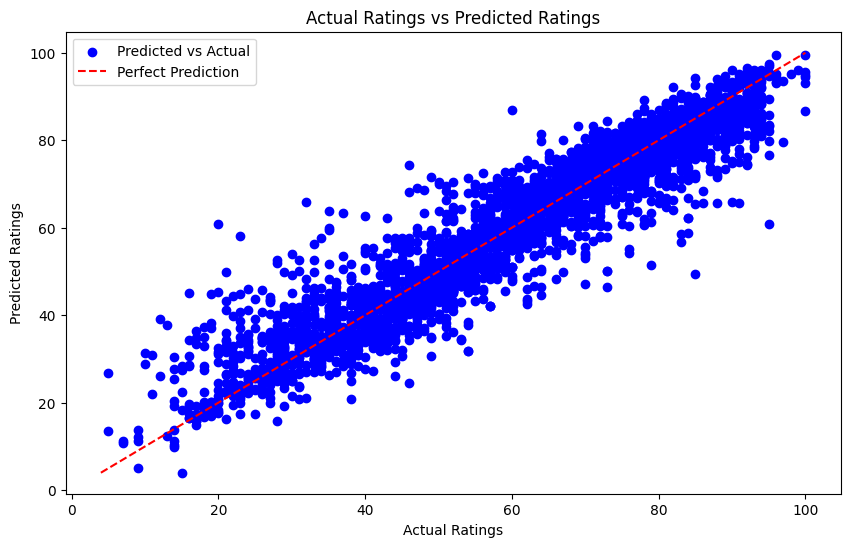

scatter plot comparing the actual vs. predicted audience ratings. The red line represents a perfect prediction, where predicted ratings exactly match the actual ones.


In [48]:

plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted ratings
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')

# Plot y = x for reference (perfect prediction line)
min_rating = min(min(y_test), min(y_pred))
max_rating = max(max(y_test), max(y_pred))
plt.plot([min_rating, max_rating], [min_rating, max_rating], 'r--', label='Perfect Prediction')

plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual Ratings vs Predicted Ratings")
plt.legend()
plt.show()
print("scatter plot comparing the actual vs. predicted audience ratings. The red line represents a perfect prediction, where predicted ratings exactly match the actual ones.")


In [39]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [40]:
!pip install openpyxl


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 5.1 MB/s eta 0:00:00


In [41]:
# Define the save path
save_path = '/content/drive/My Drive/rotten_tomatoes_data_featured_processed.xlsx'

# Save the DataFrame to an Excel file
rotten_tomatoes_data_featured.to_excel(save_path, index=False)

# Confirm the file is saved
print(f"File saved to {save_path}")


File saved to /content/drive/My Drive/rotten_tomatoes_data_featured_processed.xlsx
